In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [113]:
# Load the data
filepath = r'C:\Users\Admin\OneDrive - Hanoi University of Science and Technology\Training đi thi\Project\Advanced_Regression\data\raw\train.csv'
data = pd.read_csv(filepath, index_col='Id')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [114]:
data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [115]:
# Check for missing values
lst_of_missing = []
for col in data.columns:
    if data[col].isnull().sum() > 0:
        lst_of_missing.append(col)
        print(f'{col:<13}: {data[col].isnull().sum(): <4} missing values - {data[col].isnull().sum() / len(data) * 100:.2f}% - {data[col].dtype}')

LotFrontage  : 259  missing values - 17.74% - float64
Alley        : 1369 missing values - 93.77% - object
MasVnrType   : 872  missing values - 59.73% - object
MasVnrArea   : 8    missing values - 0.55% - float64
BsmtQual     : 37   missing values - 2.53% - object
BsmtCond     : 37   missing values - 2.53% - object
BsmtExposure : 38   missing values - 2.60% - object
BsmtFinType1 : 37   missing values - 2.53% - object
BsmtFinType2 : 38   missing values - 2.60% - object
Electrical   : 1    missing values - 0.07% - object
FireplaceQu  : 690  missing values - 47.26% - object
GarageType   : 81   missing values - 5.55% - object
GarageYrBlt  : 81   missing values - 5.55% - float64
GarageFinish : 81   missing values - 5.55% - object
GarageQual   : 81   missing values - 5.55% - object
GarageCond   : 81   missing values - 5.55% - object
PoolQC       : 1453 missing values - 99.52% - object
Fence        : 1179 missing values - 80.75% - object
MiscFeature  : 1406 missing values - 96.30% - object


In [116]:
lst_of_numerical = []
lst_of_categorical = []
for col in data.columns:
    if data[col].dtype == 'object':
        lst_of_categorical.append(col)
    else:
        lst_of_numerical.append(col)

# Numerical Features

In [117]:
num_missing = set(lst_of_numerical)&set(lst_of_missing)
num_missing.add("SalePrice")
data[list(num_missing)].head(10)

,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
Id,,,,
1,65.0,196.0,2003.0,208500
2,80.0,0.0,1976.0,181500
3,68.0,162.0,2001.0,223500
4,60.0,0.0,1998.0,140000
5,84.0,350.0,2000.0,250000
6,85.0,0.0,1993.0,143000
7,75.0,186.0,2004.0,307000
8,NaN,240.0,1973.0,200000
9,51.0,0.0,1931.0,129900


### Fill missing

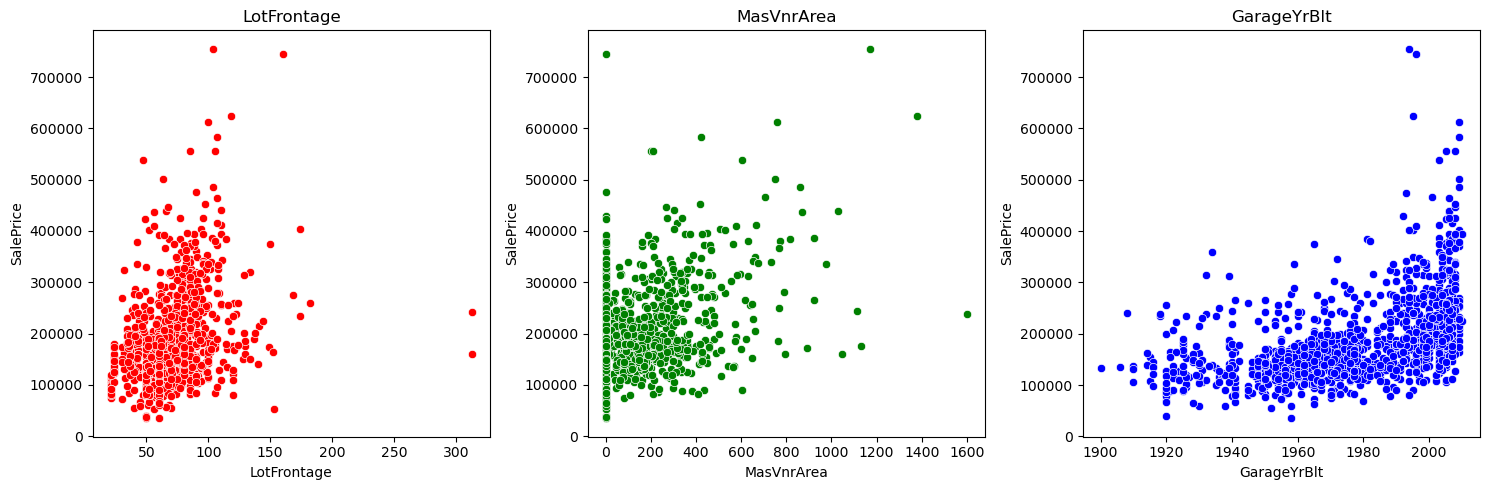

In [118]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x='LotFrontage', y='SalePrice', data=data, ax=ax[0], color='r').set(title='LotFrontage')
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=data, ax=ax[1], color='g').set(title='MasVnrArea')
sns.scatterplot(x='GarageYrBlt', y='SalePrice', data=data, ax=ax[2], color='b').set(title='GarageYrBlt')
plt.tight_layout()
plt.show()

### Correlation 
- The correlation coefficient is a statistical measure that describes the strength and direction of a relationship between two variables.
- It ranges from -1 to 1.
- The closer the correlation coefficient is to 1, the more positively correlated the variables are.
- The closer the correlation coefficient is to -1, the more negatively correlated the variables are.
- The closer the correlation coefficient is to 0, the weaker the relationship between the variables.
- The correlation coefficient is calculated as follows:
$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}} $$

In [119]:
correlation_matrix = data[lst_of_numerical].corr()
print(correlation_matrix)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808   

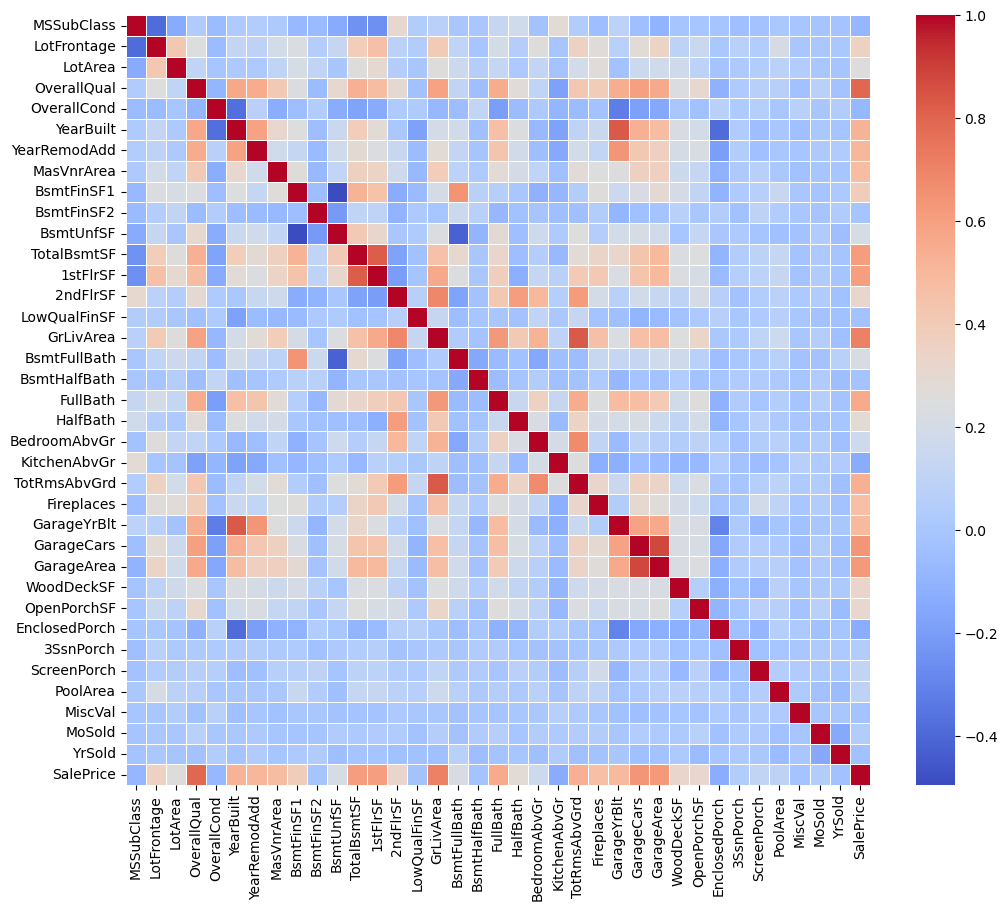

In [120]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8692\57435265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_saleprice.index,y=corr_with_saleprice.values, palette='coolwarm')


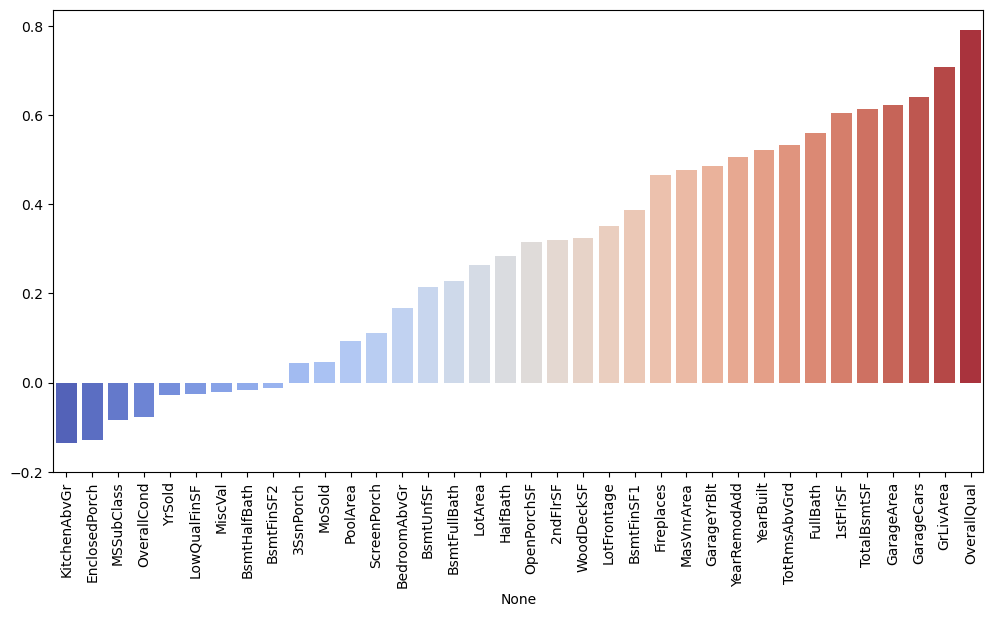

In [121]:
corr_with_saleprice = correlation_matrix.loc[:'YrSold', 'SalePrice'].sort_values(ascending=True)
plt.figure(figsize=(12, 6))
sns.barplot(x=corr_with_saleprice.index,y=corr_with_saleprice.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(-0.2,1,0.2))
plt.show()

# Categorical Features

In [122]:
cat_missing = set(lst_of_categorical)&set(lst_of_missing)
data[list(cat_missing)].head(10)

,Fence,BsmtFinType2,MasVnrType,MiscFeature,GarageType,BsmtQual,Alley,Electrical,BsmtFinType1,GarageFinish,BsmtExposure,BsmtCond,FireplaceQu,PoolQC,GarageQual,GarageCond
Id,,,,,,,,,,,,,,,,
1,NaN,Unf,BrkFace,NaN,Attchd,Gd,NaN,SBrkr,GLQ,RFn,No,TA,NaN,NaN,TA,TA
2,NaN,Unf,NaN,NaN,Attchd,Gd,NaN,SBrkr,ALQ,RFn,Gd,TA,TA,NaN,TA,TA
3,NaN,Unf,BrkFace,NaN,Attchd,Gd,NaN,SBrkr,GLQ,RFn,Mn,TA,TA,NaN,TA,TA
4,NaN,Unf,NaN,NaN,Detchd,TA,NaN,SBrkr,ALQ,Unf,No,Gd,Gd,NaN,TA,TA
5,NaN,Unf,BrkFace,NaN,Attchd,Gd,NaN,SBrkr,GLQ,RFn,Av,TA,TA,NaN,TA,TA
6,MnPrv,Unf,NaN,Shed,Attchd,Gd,NaN,SBrkr,GLQ,Unf,No,TA,NaN,NaN,TA,TA
7,NaN,Unf,Stone,NaN,Attchd,Ex,NaN,SBrkr,GLQ,RFn,Av,TA,Gd,NaN,TA,TA
8,NaN,BLQ,Stone,Shed,Attchd,Gd,NaN,SBrkr,ALQ,RFn,Mn,TA,TA,NaN,TA,TA
9,NaN,Unf,NaN,NaN,Detchd,TA,NaN,FuseF,Unf,Unf,No,TA,TA,NaN,Fa,TA


In [123]:
for col in cat_missing:
    print(f'{col:<13}: {data[col].isnull().sum(): <4} missing values - {data[col].isnull().sum() / len(data) * 100:.2f}% - {len(data[col].unique())} unique values')

Fence        : 1179 missing values - 80.75% - 5 unique values
BsmtFinType2 : 38   missing values - 2.60% - 7 unique values
MasVnrType   : 872  missing values - 59.73% - 4 unique values
MiscFeature  : 1406 missing values - 96.30% - 5 unique values
GarageType   : 81   missing values - 5.55% - 7 unique values
BsmtQual     : 37   missing values - 2.53% - 5 unique values
Alley        : 1369 missing values - 93.77% - 3 unique values
Electrical   : 1    missing values - 0.07% - 6 unique values
BsmtFinType1 : 37   missing values - 2.53% - 7 unique values
GarageFinish : 81   missing values - 5.55% - 4 unique values
BsmtExposure : 38   missing values - 2.60% - 5 unique values
BsmtCond     : 37   missing values - 2.53% - 5 unique values
FireplaceQu  : 690  missing values - 47.26% - 6 unique values
PoolQC       : 1453 missing values - 99.52% - 4 unique values
GarageQual   : 81   missing values - 5.55% - 6 unique values
GarageCond   : 81   missing values - 5.55% - 6 unique values
